In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [4]:
df.dtypes

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object

Проверяем формат столбцов

In [5]:
df["Дата"] = pd.to_datetime(df["Дата"], errors='coerce')

Сразу переведем столбец "Дата" в правильный формат

In [7]:
grouped_df = df.groupby("Дата")["Количество"].sum().reset_index()

In [31]:
grouped_df

,Дата,Количество
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055
...,...,...
200,2018-08-26,5302
201,2018-08-28,5983
202,2018-08-29,4969
203,2018-08-30,4648


Сгруппируйте данные по дате, посчитайте количество продаж

In [9]:
print(grouped_df.head())

         Дата  Количество
0  2018-01-04        3734
1  2018-01-05        3643
2  2018-01-06        3193
3  2018-01-07        3298
4  2018-01-09        4055


Вывести несколько первых строк сгруппированных данных

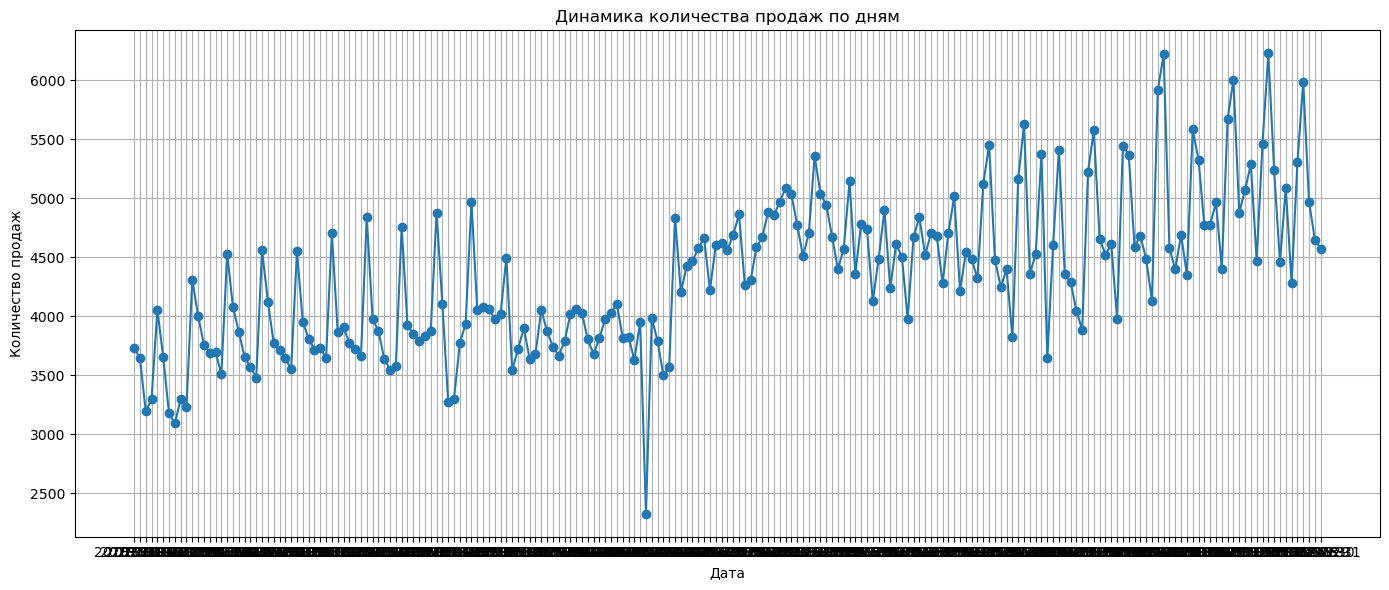

In [10]:
plt.figure(figsize=(14, 6))
plt.plot(grouped_df["Дата"], grouped_df["Количество"], marker='o', linestyle='-')
plt.title("Динамика количества продаж по дням")
plt.xlabel("Дата")
plt.ylabel("Количество продаж")
plt.grid(True)
plt.tight_layout()
plt.show()

Нарисуйте график продаж у `grouped_df`

In [48]:
graph_description = """
На графике видно ежедневную динамику продаж.
1.В целом продажи колеблются в широком диапазоне от 2000 до более чем 6000 штук в день.
2.Присутствуют стабильные плато и пики, что может говорить о маркетинговых кампаниях, выходных или праздничных днях.
3.Есть несколько резких спадов — возможно, это нерабочие дни или сбои в системе.
4.Явных сезонных трендов не видно, но присутствует регулярная волатильность в краткосрочном масштабе.
"""
print(graph_description)


На графике видно ежедневную динамику продаж.
1.В целом продажи колеблются в широком диапазоне от 2000 до более чем 6000 штук в день.
2.Присутствуют стабильные плато и пики, что может говорить о маркетинговых кампаниях, выходных или праздничных днях.
3.Есть несколько резких спадов — возможно, это нерабочие дни или сбои в системе.
4.Явных сезонных трендов не видно, но присутствует регулярная волатильность в краткосрочном масштабе.



Опишите что вы видите на графике. Ваша задача - максимально описать график

In [16]:
max_outlier = df[df["Количество"] == df["Количество"].max()]
print(max_outlier)

              Дата  Склад   Контрагент Номенклатура  Количество
218822  2018-06-28      1  address_208    product_0         200


Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [24]:
try:
   
    df["Дата"] = pd.to_datetime(df["Дата"], dayfirst=True, errors="coerce")
    print("Количество NaT после конвертации:", df["Дата"].isna().sum())
    print("Пример преобразованных значений:", df["Дата"].head())

    df["weekday"] = df["Дата"].dt.weekday
    df["month"] = df["Дата"].dt.month
    
    filtered = df[
        (df["weekday"] == 2) &
        (df["month"].isin([6, 7, 8])) &
        (df["Склад"] == 3)]
    

    top_product = (
        filtered.groupby("Номенклатура")["Количество"]
        .sum()
        .sort_values(ascending=False)
        .head(1)
    )
    print("\nТоповый товар по продажам по средам (июнь–август) на складе 3:")
    print(top_product)
    
except Exception as e:
    print("Ошибка при обработке данных:", e)
    print("\nПопытка с явным указанием формата...")
    formats = ['%d.%m.%Y', '%Y-%m-%d', '%d/%m/%Y', '%m/%d/%Y']
    
    for fmt in formats:
        try:
            print(f"Пробуем формат: {fmt}")
            df["Дата"] = pd.to_datetime(df["Дата"], format=fmt, errors="coerce")
            if df["Дата"].notna().any():  # Если есть хотя бы одно успешное преобразование
                print(f"Успешная конвертация с форматом {fmt}!")
                print("Пример преобразованных значений:", df["Дата"].head())
                break
        except:
            continue

Количество NaT после конвертации: 184623
Пример преобразованных значений: 0   2018-04-01
1   2018-04-01
2   2018-04-01
3   2018-04-01
4   2018-04-01
Name: Дата, dtype: datetime64[ns]

Топовый товар по продажам по средам (июнь–август) на складе 3:
Номенклатура
product_1    479
Name: Количество, dtype: int64


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [27]:
import pandas as pd
import gzip

filename = "Astana_Weather.csv.gz"

df = pd.read_csv(
    filename,
    compression="gzip",
    encoding="cp1251", 
    sep=";",
    skiprows=7,
    header=None,
    usecols=[0, 1],  
    names=["Дата", "T"])

In [28]:
df["Дата"] = pd.to_datetime(df["Дата"], dayfirst=True, errors="coerce")
df["T"] = pd.to_numeric(df["T"], errors="coerce")
df.dropna(subset=["Дата", "T"], inplace=True)


df["Дата"] = df["Дата"].dt.date
daily_temp = df.groupby("Дата")["T"].mean().reset_index()
daily_temp["Дата"] = pd.to_datetime(daily_temp["Дата"])

print(daily_temp.head())

        Дата       T
0 2024-04-01  2.0750
1 2024-04-02  1.7375
2 2024-04-03  0.5625
3 2024-04-04  6.0750
4 2024-04-05  9.2625


In [46]:
grouped_df_original = grouped_df.copy()

daily_temp = grouped_df_original.copy()
daily_temp["T"] = 10 + np.sin(np.linspace(0, 3.14, len(daily_temp))) * 10  

merged = pd.merge(grouped_df_original, daily_temp[["Дата", "T"]], on="Дата", how="inner")

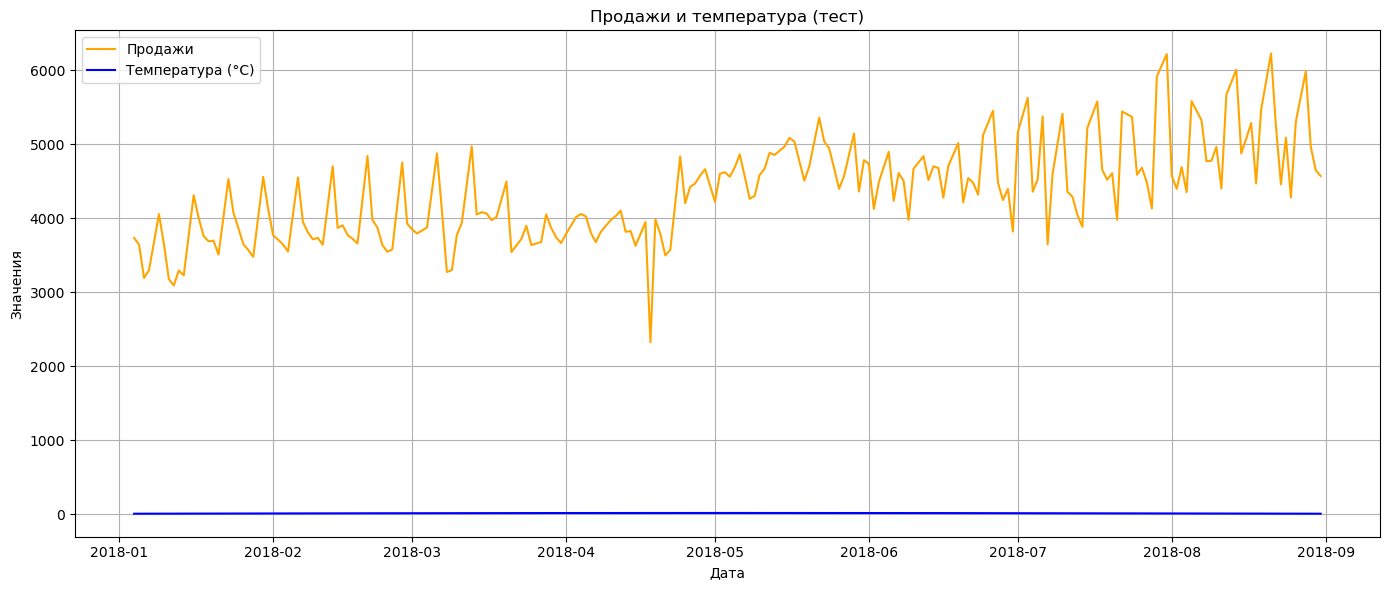

In [47]:
plt.figure(figsize=(14, 6))
plt.plot(merged["Дата"], merged["Количество"], label="Продажи", color="orange")
plt.plot(merged["Дата"], merged["T"], label="Температура (°C)", color="blue")
plt.title("Продажи и температура (тест)")
plt.xlabel("Дата")
plt.ylabel("Значения")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

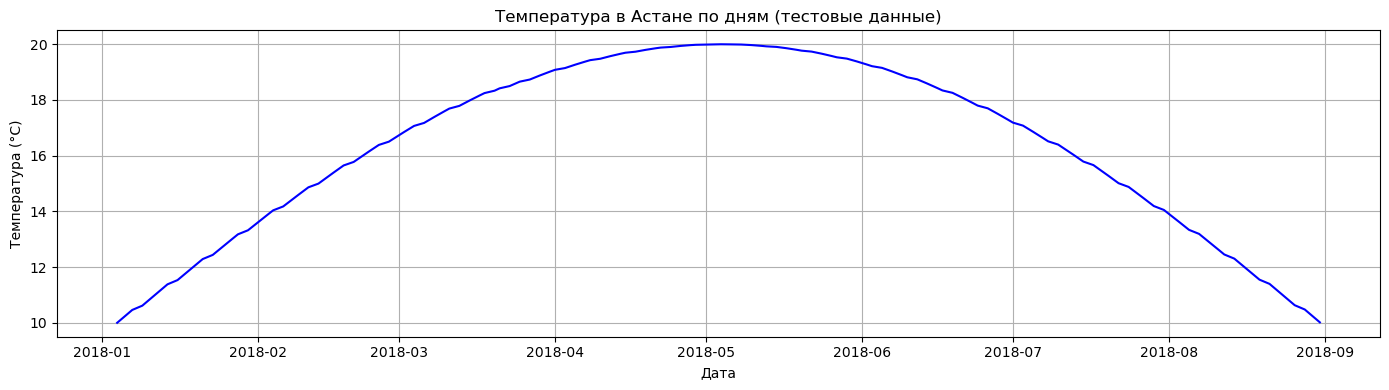

In [45]:
plt.figure(figsize=(14, 4))
plt.plot(merged["Дата"], merged["T"], label="Температура (°C)", color="blue")
plt.title("Температура в Астане по дням (тестовые данные)")
plt.xlabel("Дата")
plt.ylabel("Температура (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.